In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data representation and interaction

## The pandas data-frame

### Creating dataframes: reading data files or converting arrays

In [5]:
data = pd.read_csv('data/brain_size.csv', sep=';', na_values='.')
data

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466


###  Manipulating data

In [6]:
data.shape

(40, 8)

In [7]:
data.columns

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

In [8]:
data['Gender']

0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object

In [9]:
# Simpler selection

data[data['Gender'] == 'Female']['VIQ'].mean() 

109.45

In [10]:
data.describe()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,20.500000,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,11.690452,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,1.000000,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,10.750000,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,20.500000,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,30.250000,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,40.000000,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


#### groupby: splitting a dataframe on values of categorical variables:

In [12]:
groupby_gender = data.groupby('Gender')

for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))
    

('Female', 109.45)
('Male', 115.25)


In [13]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


## Plotting data

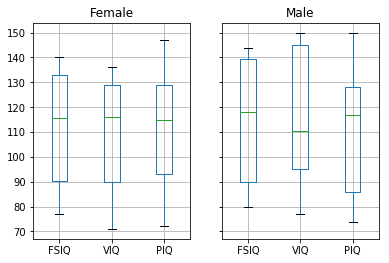

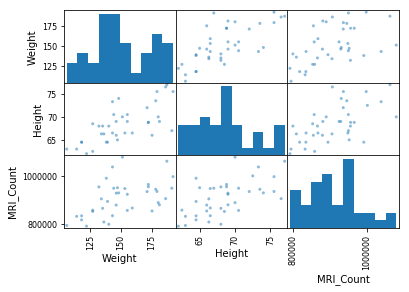

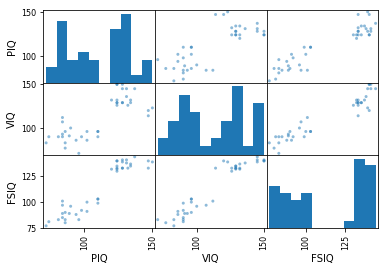

In [17]:
groupby_gender.boxplot(column=['FSIQ', 'VIQ', 'PIQ'])


# Scatter matrices for different columns
pd.plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])
pd.plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])

plt.show()


# Hypothesis testing: comparing two groups

In [20]:
from scipy import stats

## Student’s t-test: the simplest statistical test

### 1-sample t-test: testing the value of a population mean
**scipy.stats.ttest_1samp()** tests if the population mean of data is likely to be equal to a given value (technically if observations are drawn from a Gaussian distributions of given population mean). It returns the T statistic, and the p-value 

In [22]:
stats.ttest_1samp(data['VIQ'], 0)

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

 With a p-value of 10^-28 we can claim that the population mean for the IQ (VIQ measure) is not 0.

### 2-sample t-test: testing for difference across populations
We have seen above that the mean VIQ in the male and female populations were different. To test if this is significant, we do a 2-sample t-test with **scipy.stats.ttest_ind():**

In [23]:
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']

stats.ttest_ind(female_viq, male_viq)

Ttest_indResult(statistic=-0.77261617232750113, pvalue=0.44452876778583217)

## Paired tests: repeated measurements on the same indivuals

In [24]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])


Ttest_indResult(statistic=0.46563759638096403, pvalue=0.64277250094148408)

The problem with this approach is that it forgets that there are links between observations: FSIQ and PIQ are measured on the same individuals. Thus the variance due to inter-subject variability is confounding, and can be removed, using a “paired test”, or “repeated measures test”:

In [26]:
stats.ttest_rel(data['FSIQ'], data['PIQ'])

Ttest_relResult(statistic=1.7842019405859857, pvalue=0.082172638183642358)

This is equivalent to a 1-sample test on the difference:

In [27]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)  

Ttest_1sampResult(statistic=1.7842019405859857, pvalue=0.082172638183642358)

**T-tests assume Gaussian errors. We can use a Wilcoxon signed-rank test, that relaxes this assumption:**

In [28]:
stats.wilcoxon(data['FSIQ'], data['PIQ'])

WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

**Note:** The corresponding test in the non paired case is the Mann–Whitney U test, **scipy.stats.mannwhitneyu().**

In [32]:
female_wt = data[data['Gender'] == 'Female']['Weight']
male_wt = data[data['Gender'] == 'Male']['Weight']

stats.mannwhitneyu(male_wt, female_wt)


MannwhitneyuResult(statistic=54.0, pvalue=4.1271169350963759e-05)

In [33]:
stats.mannwhitneyu(male_viq, female_viq)

MannwhitneyuResult(statistic=164.5, pvalue=0.17114434343636575)

# Linear models, multiple factors, and analysis of variance

## “formulas” to specify statistical models in Python

### A simple linear regression
Given two set of observations, x and y, we want to test the hypothesis that y is a linear function of x. In other terms:

y = x * coef + intercept + e

where e is observation noise. We will use the statsmodels module to:
1. Fit a linear model. We will use the simplest strategy, ordinary least squares (OLS).
2. Test that coef is non zero.

**First, we generate simulated data according to the model:**

In [35]:
x = np.linspace(-5, 5, 20)
np.random.seed(1)

# normal distributed noise
y = -5 + 3*x + 4*np.random.normal(size=x.shape)

# Create a data frame containing all the relevant variables
df = pd.DataFrame({'x': x, 'y': y})
df

,x,y
0,-5.000000,-13.502619
1,-4.473684,-20.868078
2,-3.947368,-18.954792
3,-3.421053,-19.555032
4,-2.894737,-10.222580
5,-2.368421,-21.311418
6,-1.842105,-3.547069
7,-1.315789,-11.992196
8,-0.789474,-6.092265
9,-0.263158,-6.786955


**Then we specify an OLS model and fit it:**

In [47]:
from statsmodels.formula.api import ols

model = ols("y~x", df).fit()

In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Sun, 28 Jan 2018   Prob (F-statistic):           8.56e-08
Time:                        17:22:18   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.000      -7.710      -3.357
x              2.9369      0.341      8.604      0.000       2.220       3.654
==============================================================================
Omnibus:                        0.100   Durbin-Watson:                   2.956
Prob(Omnibus):                  0.951   Jarque-Bera (JB):                0.322
Skew:                          -0.058   Prob(JB):                        0.851
Kurtosis:                       2.390   Cond. No.                         3.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Terminology:**

Statsmodels uses a statistical terminology: the y variable in statsmodels is called ‘endogenous’ while the x variable is called exogenous.

To simplify, y (endogenous) is the value you are trying to predict, while x (exogenous) represents the features you are using to make the prediction.



In [52]:
model.params

Intercept   -5.533459
x            2.936888
dtype: float64

### Categorical variables: comparing groups or multiple categories

In [53]:
data = pd.read_csv('data/brain_size.csv', sep=';', na_values=".")


In [54]:
model = ols("VIQ ~ Gender + 1", data).fit()


In [55]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Sun, 28 Jan 2018   Prob (F-statistic):              0.445
Time:                        17:23:01   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.619      0.000      98.704     120.196
Gender[T.Male]     5.8000      7.507      0.773      0.445      -9.397      20.997
==============================================================================
Omnibus:                       26.188   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.703
Skew:                           0.010   Prob(JB):                        0.157
Kurtosis:                       1.510   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Tips on specifying model

**Forcing categorical:**
    
the ‘Gender’ is automatically detected as a categorical variable, and thus each of its different values are treated as different entities.

An integer column can be forced to be treated as categorical using:

In [56]:
model = ols('VIQ ~ C(Gender)', data).fit()

In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Sun, 28 Jan 2018   Prob (F-statistic):              0.445
Time:                        17:24:44   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           109.4500      5.308     20.619      0.000      98.704     120.196
C(Gender)[T.Male]     5.8000      7.507      0.773      0.445      -9.397      20.997
==============================================================================
Omnibus:                       26.188   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.703
Skew:                           0.010   Prob(JB):                        0.157
Kurtosis:                       1.510   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Link to t-tests between different FSIQ and PIQ
To compare different types of IQ, we need to create a “long-form” table, listing IQs, where the type of IQ is indicated by a categorical variable:

In [58]:
data_fisq = pd.DataFrame({'iq': data['FSIQ'], 'type': 'fsiq'})
data_piq = pd.DataFrame({'iq': data['PIQ'], 'type': 'piq'})

data_long = pd.concat((data_fisq, data_piq))
data_long


,iq,type
0,133,fsiq
1,140,fsiq
2,139,fsiq
3,133,fsiq
4,137,fsiq
5,99,fsiq
6,138,fsiq
7,92,fsiq
8,89,fsiq
9,133,fsiq


In [61]:
model = ols("iq ~ type", data_long).fit()


In [62]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     iq   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2168
Date:                Sun, 28 Jan 2018   Prob (F-statistic):              0.643
Time:                        17:27:30   Log-Likelihood:                -364.35
No. Observations:                  80   AIC:                             732.7
Df Residuals:                      78   BIC:                             737.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     113.4500      3.683     30.807      0.000     106.119     120.781
type[T.piq]    -2.4250      5.208     -0.466      0.643     -12.793       7.943
==============================================================================
Omnibus:                      164.598   Durbin-Watson:                   1.531
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.062
Skew:                          -0.110   Prob(JB):                       0.0178
Kurtosis:                       1.461   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that we retrieve the same values for t-test and corresponding p-values for the effect of the type of iq than the previous t-test:

In [63]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])   


Ttest_indResult(statistic=0.46563759638096403, pvalue=0.64277250094148408)

### Multiple Regression: including multiple factors
Consider a linear model explaining a variable z (the dependent variable) with 2 variables x and y:

z = $x \, c_1 + y \, c_2 $+ i + e

Example: the iris data (data/iris.csv)

In [92]:
data = pd.read_csv('data/iris.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [65]:
data.columns


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'name'], dtype='object')

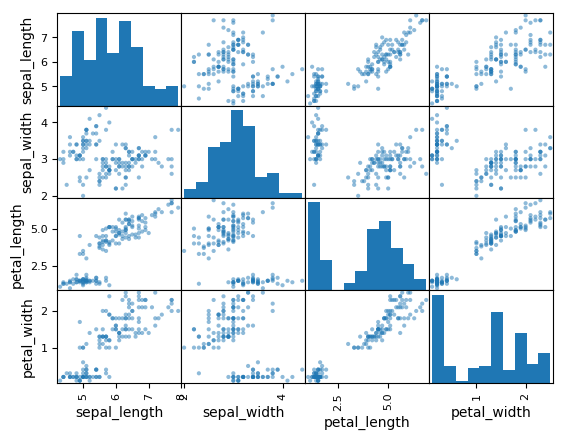

In [93]:
pd.plotting.scatter_matrix(data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
plt.show()


In [70]:
model = ols("sepal_width ~ name + petal_length", data).fit()


In [71]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Sun, 28 Jan 2018   Prob (F-statistic):           1.58e-20
Time:                        17:38:36   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0.099     29.989      0.000       2.785       3.178
name[T.versicolor]    -1.4821      0.181     -8.190      0.000      -1.840      -1.124
name[T.virginica]     -1.6635      0.256     -6.502      0.000      -2.169      -1.158
petal_length           0.2983      0.061      4.920      0.000       0.178       0.418
==============================================================================
Omnibus:                        2.868   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                2.885
Skew:                          -0.082   Prob(JB):                        0.236
Kurtosis:                       3.659   Cond. No.                         54.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Post-hoc hypothesis testing: analysis of variance (ANOVA)
In the above iris example, we wish to test if the petal length is different between versicolor and virginica, after removing the effect of sepal width. This can be formulated as testing the difference between the coefficient associated to versicolor and virginica in the linear model estimated above (it is an Analysis of Variance, ANOVA). For this, we write a vector of ‘contrast’ on the parameters estimated: we want to test "name[T.versicolor] - name[T.virginica]", with an F-test:

In [72]:
model.f_test([0, 1, -1, 0])


<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[ 3.24533535]]), p=0.07369058781700738, df_denom=146, df_num=1>

# More visualization: seaborn for statistical exploration
Seaborn combines simple statistical fits with plotting on pandas dataframes.

In [73]:
import urllib
import os

**Load the data**

In [94]:

# Give names to the columns
names = [
    'EDUCATION: Number of years of education',
    'SOUTH: 1=Person lives in South, 0=Person lives elsewhere',
    'SEX: 1=Female, 0=Male',
    'EXPERIENCE: Number of years of work experience',
    'UNION: 1=Union member, 0=Not union member',
    'WAGE: Wage (dollars per hour)',
    'AGE: years',
    'RACE: 1=Other, 2=Hispanic, 3=White',
    'OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other',
    'SECTOR: 0=Other, 1=Manufacturing, 2=Construction',
    'MARR: 0=Unmarried,  1=Married',
]

short_names = [n.split(':')[0] for n in names]

data = pd.read_csv('data/wages.txt', skiprows=27, skipfooter=6, sep=None,
                       header=None, engine='python')
data.columns = short_names

data['WAGE'] = np.log10(data['WAGE'])

data

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,10,0,0,30,0,0.812913,46,3,6,0,1
1,12,0,1,8,0,0.525045,26,3,6,1,1
2,12,0,0,8,0,0.676694,26,3,6,0,1
3,14,0,0,13,0,0.949390,33,3,6,0,0
4,12,1,1,46,0,0.602060,64,3,6,0,0
5,8,0,0,19,0,0.672098,33,3,6,0,1
6,17,1,1,1,0,0.698970,24,3,6,0,0
7,12,0,0,19,0,0.966142,37,3,6,1,0
8,12,0,0,36,0,1.028164,54,1,6,0,0
9,12,1,0,20,0,0.881385,38,1,6,2,1


In [95]:
data.columns

Index(['EDUCATION', 'SOUTH', 'SEX', 'EXPERIENCE', 'UNION', 'WAGE', 'AGE',
       'RACE', 'OCCUPATION', 'SECTOR', 'MARR'],
      dtype='object')

#### Pairplot: scatter matrices

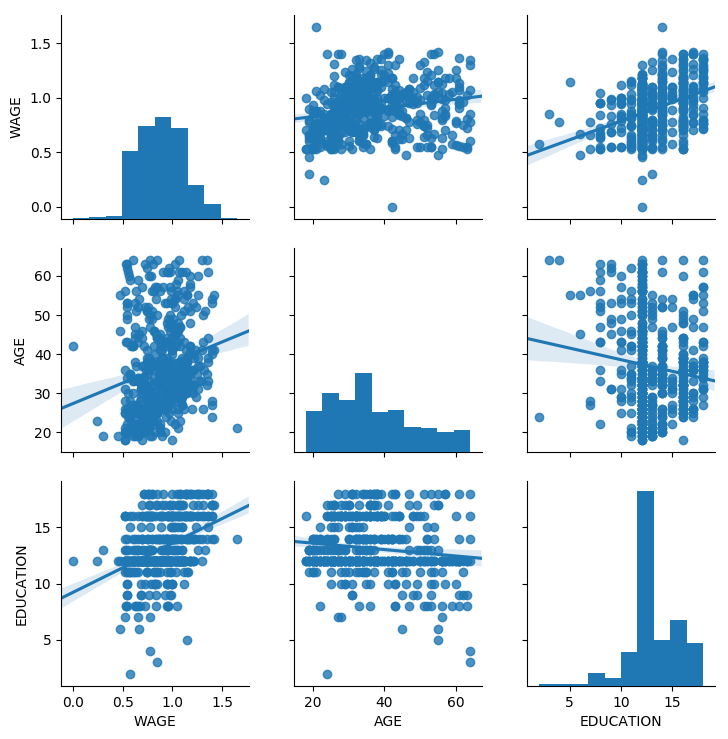

In [96]:
import seaborn

seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'], kind='reg')



#### Categorical variables can be plotted as the hue:

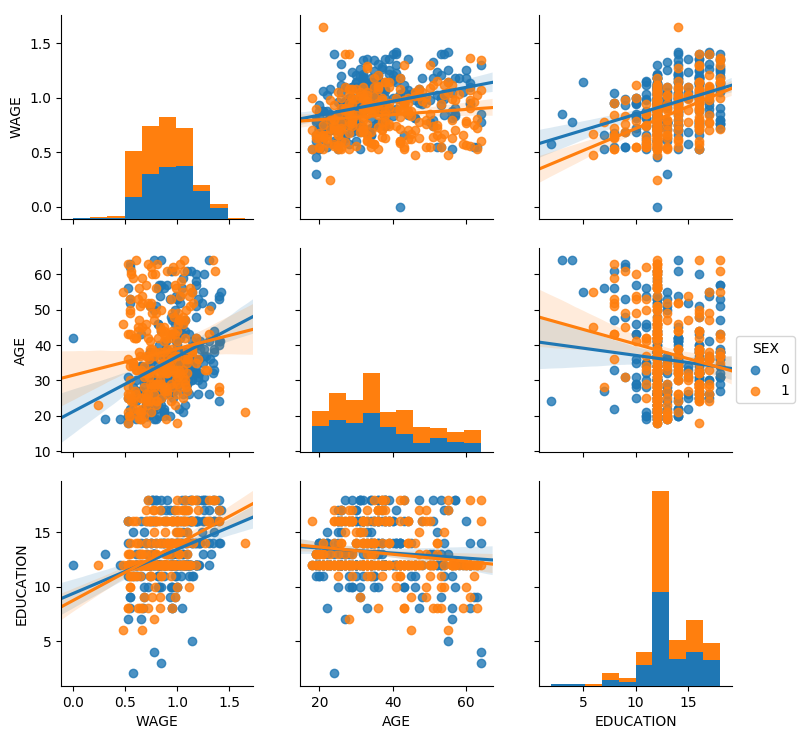

In [97]:

seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                 kind='reg', hue='SEX')  


###  lmplot: plotting a univariate regression
A regression capturing the relation between one variable and another, eg wage and eduction, can be plotted using **seaborn.lmplot():**

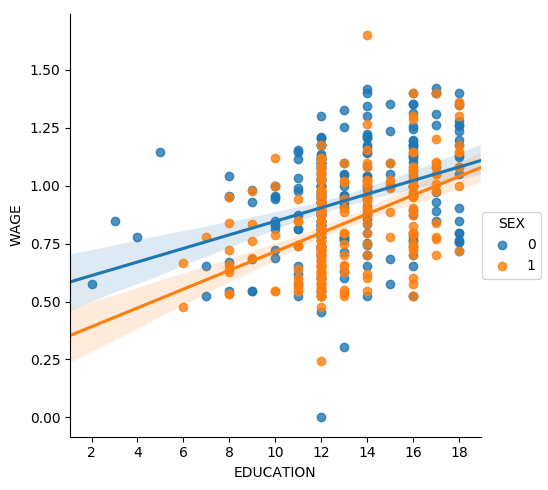

In [98]:
seaborn.lmplot(y='WAGE', x='EDUCATION', data=data, hue='SEX')

#### Robust regression

Given that, in the above plot, there seems to be a couple of data points that are outside of the main cloud to the right, they might be outliers, not representative of the population, but driving the regression.

To compute a regression that is less sentive to outliers, one must use a robust model. This is done in seaborn using robust=True in the plotting functions, or in statsmodels by replacing the use of the OLS by a “Robust Linear Model”, **statsmodels.formula.api.rlm().**

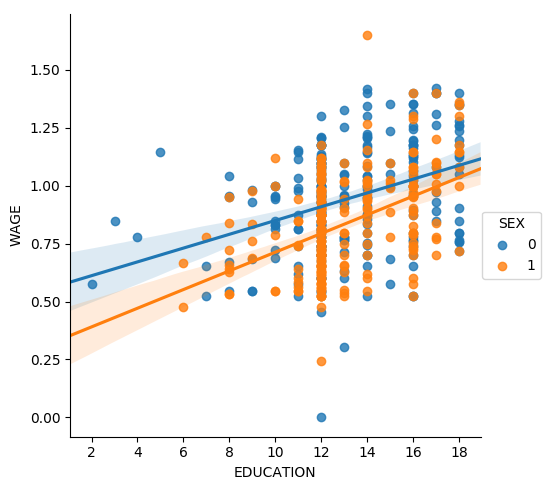

In [99]:
seaborn.lmplot(y='WAGE', x='EDUCATION', data=data, hue='SEX', robust=True)


# Testing for interactions
Do wages increase more with education for males than females?

The plot above is made of two different fits. We need to formulate a single model that tests for a variance of slope across the to population. This is done via an **“interaction”**.

In [104]:
result = ols(formula='WAGE ~ EDUCATION + SEX + EDUCATION * SEX', data=data).fit()



In [105]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   WAGE   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     41.14
Date:                Sun, 28 Jan 2018   Prob (F-statistic):           9.23e-24
Time:                        18:10:46   Log-Likelihood:                 85.520
No. Observations:                 501   AIC:                            -163.0
Df Residuals:                     497   BIC:                            -146.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.5533      0.062      8.857      0.000       0.431       0.676
EDUCATION         0.0293      0.005      6.304      0.000       0.020       0.038
SEX              -0.2429      0.096     -2.522      0.012      -0.432      -0.054
EDUCATION:SEX     0.0112      0.007      1.554      0.121      -0.003       0.025
==============================================================================
Omnibus:                        5.387   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.569
Skew:                          -0.178   Prob(JB):                       0.0618
Kurtosis:                       3.373   Cond. No.                         176.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Take home messages

* Hypothesis testing and p-value give you the **significance** of an effect / difference
* **Formulas** (with categorical variables) enable you to express rich links in your data
* **Visualizing** your data and simple model fits matters!
* **Conditionning** (adding factors that can explain all or part of the variation) is important modeling aspect that changes the interpretation.